In [11]:
import fasttext
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn
import pandas as pd

In [2]:
model = fasttext.load_model('./models/lid.176.bin')

In [3]:
model.summary()

AttributeError: '_FastText' object has no attribute 'summary'

In [3]:
model.predict('Dinero')

(('__label__es',), array([0.72977448]))

In [4]:
result = model.predict('I am good')
result[0][0]

'__label__en'

In [5]:
LanguageList = ['eng','fra', 'spa','ita','deu']
language_map = {
    '__label__en': 'eng',
    '__label__fr': 'fra',
    '__label__it': 'ita',
    '__label__de': 'deu',
    '__label__es': 'spa',
}

In [6]:
def extract_text(text):
    lang_key = text[0][0]
    if lang_key in language_map.keys():
        return language_map[lang_key]
    else:
        return 'None'
df = pd.read_csv('./dataset/shortened-sentences.csv',  
                            index_col=0,
                            names=['lang','text'])
df = df[df['lang'].isin(LanguageList)]
output_target = df['lang'].tolist()
output_pred = [model.predict(text.replace('\n','')) for text in df['text']]
output_pred = [extract_text(output_p) for output_p in output_pred]

In [7]:
cf = confusion_matrix(output_target,output_pred,labels=LanguageList + ['None'])

In [8]:
cf

array([[115506,     78,    111,    123,     43,    422],
       [   968, 120648,    388,    324,     39,    792],
       [   276,    136, 116670,    824,     32,   2080],
       [   200,     81,    317, 105464,     20,    455],
       [   571,    148,    113,    137, 132470,   1032],
       [     0,      0,      0,      0,      0,      0]])

In [12]:
print(np.sum(cf))
print(np.trace(cf))
print(np.trace(cf)/np.sum(cf))
print((np.sum(cf) - np.trace(cf))/np.sum(cf))
print(np.sum(cf) - np.trace(cf))

600468
590758
0.9838292798284005
0.016170720171599484
9710


In [13]:
import gc
gc.collect()

2068

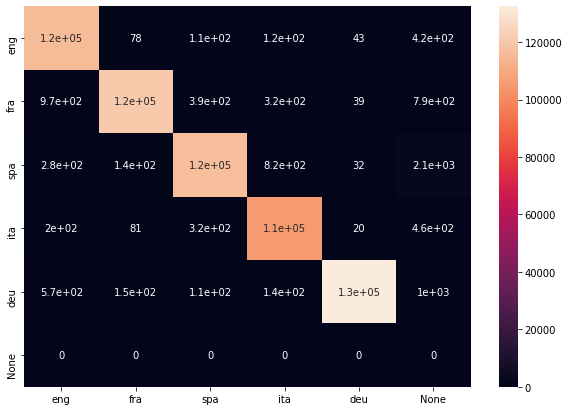

In [15]:
cf_df = pd.DataFrame(data=cf,columns=LanguageList + ['None'],index=LanguageList + ['None'])
plot.figure(figsize = (10,7))
sns_plot = sn.heatmap(cf_df, annot=True)

In [16]:
sns_plot.figure.savefig('./outputs/fasttext-model.png')